In [1]:
import pandas as pd
typeg_data=pd.read_csv("./data/2330.TW.csv")
CA_rate=[typeg_data.iat[i,4]-typeg_data.iat[i,5] for i in range(len(typeg_data))]
typeg_data['CA_rate']=CA_rate
typeg_data

,Date,Open,High,Low,Close,Adj Close,Volume,CA_rate
0,2023-05-08,509.0,509.0,502.0,504.0,493.968842,11243634,10.031158
1,2023-05-09,507.0,510.0,505.0,510.0,499.849426,16197743,10.150574
2,2023-05-10,508.0,508.0,500.0,503.0,492.988739,18859212,10.011261
3,2023-05-11,506.0,506.0,498.5,499.0,489.068359,13382927,9.931641
4,2023-05-12,496.0,500.0,495.0,496.0,486.128113,18465362,9.871887
...,...,...,...,...,...,...,...,...
239,2024-04-30,797.0,802.0,790.0,790.0,790.000000,39051972,0.000000
240,2024-05-02,789.0,789.0,772.0,772.0,772.000000,40527228,0.000000
241,2024-05-03,788.0,788.0,773.0,780.0,780.000000,29901556,0.000000
242,2024-05-06,791.0,793.0,786.0,786.0,786.000000,32599878,0.000000


             Open   High    Low  Close   Adj Close    Volume    CA_rate
Date                                                                   
2023-05-08  509.0  509.0  502.0  504.0  493.968842  11243634  10.031158
2023-05-09  507.0  510.0  505.0  510.0  499.849426  16197743  10.150574
2023-05-10  508.0  508.0  500.0  503.0  492.988739  18859212  10.011261
2023-05-11  506.0  506.0  498.5  499.0  489.068359  13382927   9.931641
2023-05-12  496.0  500.0  495.0  496.0  486.128113  18465362   9.871887


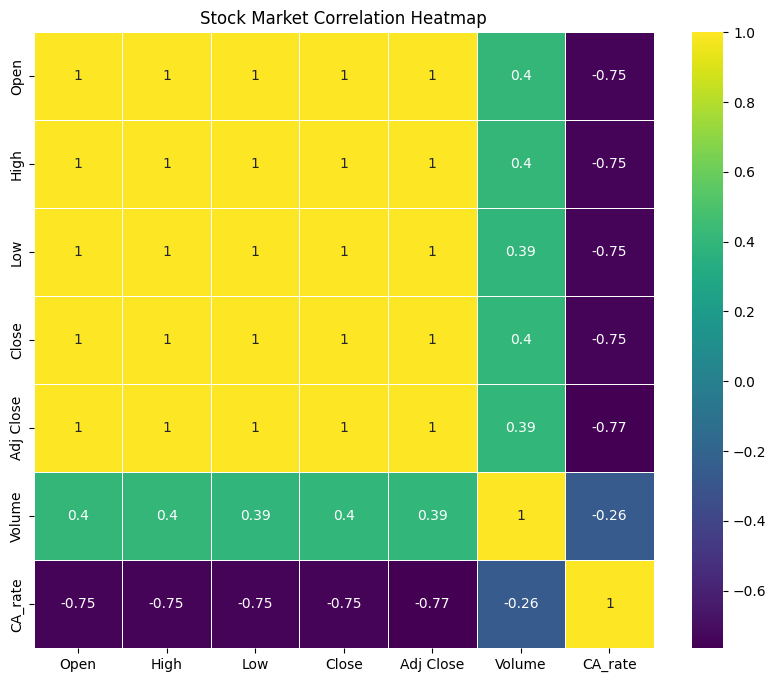

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

typeg_data.set_index('Date', inplace=True)

# 检查数据
print(typeg_data.head())

# 计算相关矩阵
corr_matrix = typeg_data.corr()

# 生成热图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Stock Market Correlation Heatmap')
plt.show()

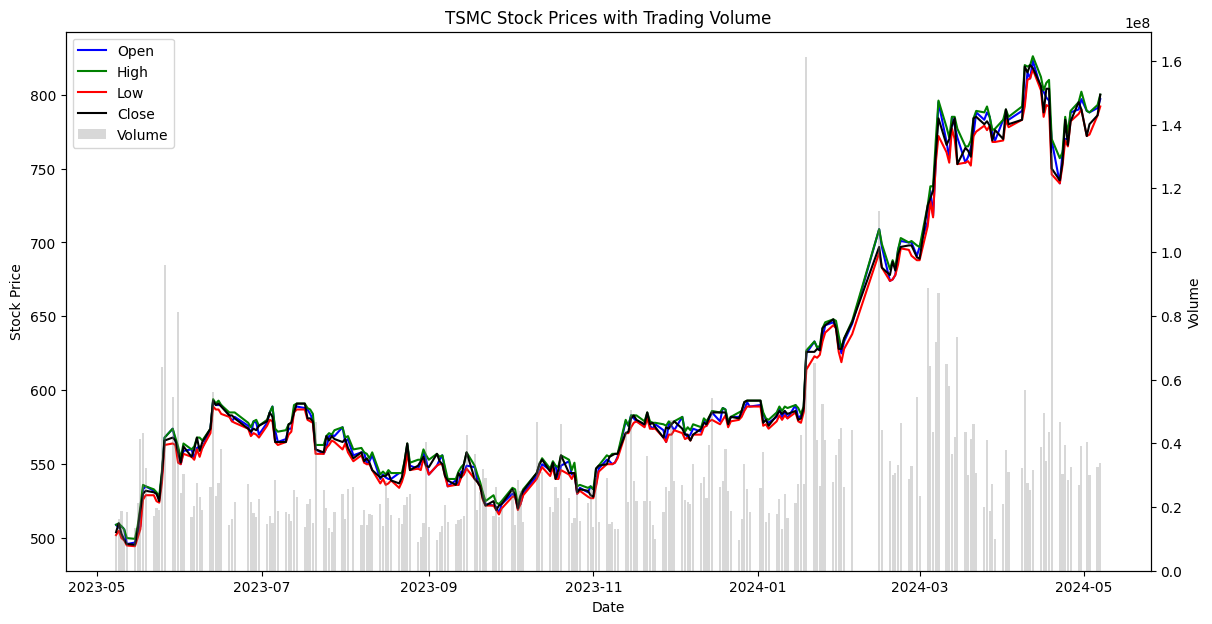

In [6]:
file_path = './data/2330.TW.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])

# 將Date設為索引
data.set_index('Date', inplace=True)

# 繪製股價數據
fig, ax1 = plt.subplots(figsize=(14, 7))

# 繪製開盤價、最高價、最低價和收盤價曲線
ax1.plot(data.index, data['Open'], label='Open', color='blue')
ax1.plot(data.index, data['High'], label='High', color='green')
ax1.plot(data.index, data['Low'], label='Low', color='red')
ax1.plot(data.index, data['Close'], label='Close', color='black')

# 設置標籤和標題
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax1.set_title('TSMC Stock Prices with Trading Volume')

# 添加第二個y軸以顯示交易量
ax2 = ax1.twinx()
ax2.bar(data.index, data['Volume'], alpha=0.3, color='grey', label='Volume')
ax2.set_ylabel('Volume')

# 添加圖例
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper left')

# 顯示圖表
plt.show()

In [13]:
test_10day=typeg_data.rename(columns={'Close':'clo'})

test_day=test_10day.filter(['clo'])
test_day=test_day.reset_index(drop=True);test_day

,clo
0,504.0
1,510.0
2,503.0
3,499.0
4,496.0
...,...
239,790.0
240,772.0
241,780.0
242,786.0


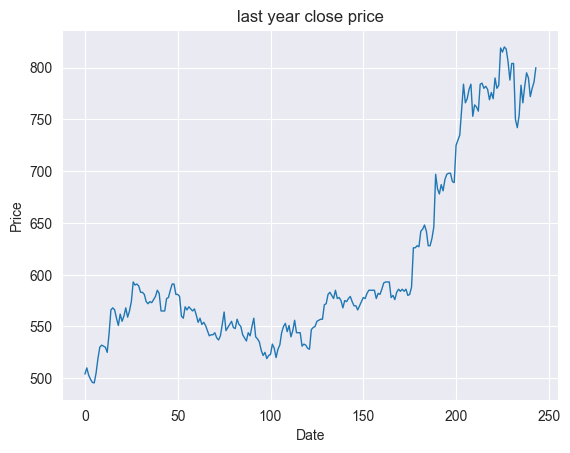

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
# plt.style.use("seaborn-darkgrid")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title('last year close price')
# plt.plot(test_10day['High']-test_10day['clo'],linewidth=1)
plt.plot(test_day['clo'],linewidth=1)

plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as  np

MOVING_WIN_SIZE=35

scaler=MinMaxScaler(feature_range=(0,1))
scaler_prices=scaler.fit_transform(test_day.values)

all_x,all_y=[],[]
for i in range(len(scaler_prices)-MOVING_WIN_SIZE):
    x=scaler_prices[i:i+MOVING_WIN_SIZE]
    y=scaler_prices[i+MOVING_WIN_SIZE]
    all_x.append(x)
    all_y.append(y)

all_x,all_y=np.array(all_x),np.array(all_y)

In [16]:
DS_SPLIT=0.8

train_ds_size=round(all_x.shape[0]*DS_SPLIT)
train_x,train_y=all_x[:train_ds_size],all_y[:train_ds_size]
test_x,test_y=all_x[train_ds_size:],all_y[train_ds_size:]

In [17]:
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential

model =Sequential()
model.add(LSTM(units=128,return_sequences=True,input_shape=(train_x.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 35, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 50)                35800     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 103,661
Trainable params: 103,661
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping( monitor="val_loss",patience=100,restore_best_weights=True)
model.fit(train_x,train_y,
          validation_split=0.2,
          callbacks=[callback],
          epochs=1000
          )

Epoch 1/1000
5/5 [==============================] - 3s 200ms/step - loss: 0.0199 - val_loss: 0.0086
Epoch 2/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0056 - val_loss: 0.0559
Epoch 3/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0034 - val_loss: 0.0509
Epoch 4/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0019 - val_loss: 0.0259
Epoch 5/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0026 - val_loss: 0.0304
Epoch 6/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0017 - val_loss: 0.0456
Epoch 7/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0023 - val_loss: 0.0421
Epoch 8/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0018 - val_loss: 0.0256
Epoch 9/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0018 - val_loss: 0.0284
Epoch 10/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0016 - val_loss: 0.0357
Epoch 11

In [20]:
preds=scaler.inverse_transform(model.predict(test_x))
preds

2/2 [==============================] - 0s 5ms/step


array([[740.7979 ],
       [744.63354],
       [769.26843],
       [793.3133 ],
       [772.88837],
       [778.2061 ],
       [788.6491 ],
       [794.31573],
       [761.6264 ],
       [777.43866],
       [775.0462 ],
       [771.5117 ],
       [799.22455],
       [796.82434],
       [790.7177 ],
       [793.12836],
       [789.66156],
       [779.55023],
       [788.15173],
       [780.47186],
       [801.6772 ],
       [787.58356],
       [791.52563],
       [828.47516],
       [818.52057],
       [824.46454],
       [821.551  ],
       [809.7965 ],
       [793.48773],
       [814.2261 ],
       [811.2231 ],
       [754.11163],
       [754.3753 ],
       [766.4556 ],
       [793.61206],
       [770.6128 ],
       [787.44415],
       [797.5237 ],
       [790.24475],
       [772.14417],
       [782.88324],
       [788.1964 ]], dtype=float32)

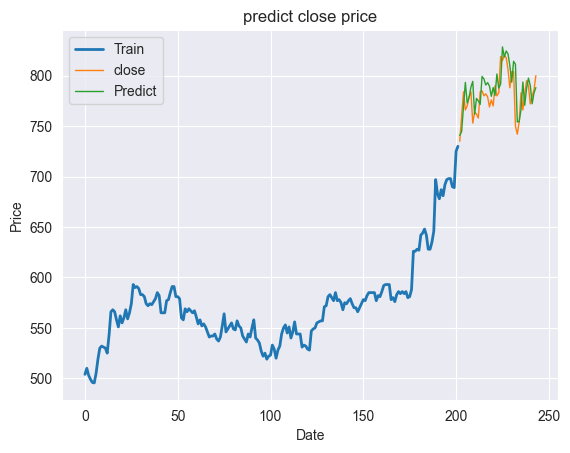

In [21]:
train_data=test_day[:train_ds_size+MOVING_WIN_SIZE]
test_data=test_day[train_ds_size+MOVING_WIN_SIZE:]
test_data=test_data.assign(Predict=preds)

plt.xlabel("Date")
plt.ylabel("Price")
plt.title('predict close price')
plt.plot(train_data['clo'],linewidth=2)
plt.plot(test_data['clo'],linewidth=1)
plt.plot(test_data['Predict'],linewidth=1)

plt.legend(["Train","close","Predict"])
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error

test_data=test_data.assign(Shifted=test_data['clo'].shift(1))
test_data.iat[0,-1]=train_data.iat[-1,-1]

predict_rmse=mean_squared_error(test_data['clo'],test_data['Predict'],squared=False)
predict_cvrmse=predict_rmse / test_data['clo'].mean()*100

shifted_rmse=mean_squared_error(test_data['clo'],test_data['Shifted'],squared=False)
shifted_cvrmse=shifted_rmse / test_data['clo'].mean()*100


print(f"predict\t=  {predict_cvrmse} % \nshift\t=  {shifted_cvrmse} %")

predict	=  2.2897713219624696 % 
shift	=  2.1276107527822123 %


c:\Users\payten\anaconda3\envs\DL_39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\payten\anaconda3\envs\DL_39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
model.save('./tsmc_v1.h5')